<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/IBM_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4 pandas matplotlib

In [8]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly

In [2]:
#Step 2: Import Required Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [11]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

In [12]:
soup = BeautifulSoup(data, 'html.parser')

In [13]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [14]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    # Finally we append the data of each row to the table
    netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)

In [15]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [16]:
read_html_pandas_data = pd.read_html(url)

In [17]:
read_html_pandas_data = pd.read_html(str(soup))

In [18]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [3]:
#Step 3: Scrape Historical Stock Data
#Define the target URL
#For example, extracting stock prices from Yahoo Finance or NASDAQ:


url = "https://finance.yahoo.com/quote/TSLA/history?p=TSLA"  # Replace with actual source
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

In [5]:
#Find the table containing stock data

table = soup.find("table")  # Adjust based on website structure
rows = table.find_all("tr")

data = []
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) > 1:
        date = cols[0].text
        close_price = cols[4].text
        data.append([date, close_price])

df = pd.DataFrame(data, columns=["Date", "Closing Price"])
df["Closing Price"] = df["Closing Price"].str.replace(",", "").astype(float)
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

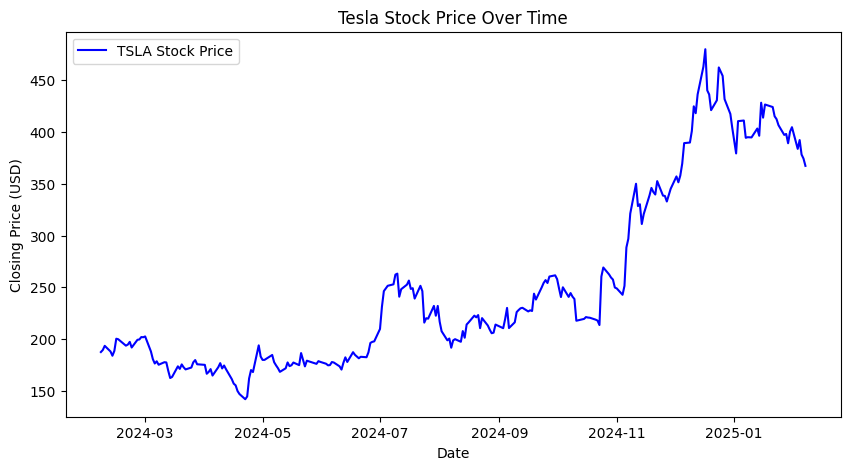

In [6]:
#Step 4: Plot Stock Data

plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Closing Price"], label="TSLA Stock Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Tesla Stock Price Over Time")
plt.legend()
plt.show()

In [7]:
import yfinance as yf
# Download historical data for a stock
msft = yf.Ticker("MSFT")
msft_data = msft.history(period="max")
# Display the downloaded data
msft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054485,0.062498,0.054485,0.059827,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059827,0.063032,0.059827,0.061963,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.061963,0.063566,0.061963,0.063032,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063032,0.063566,0.060895,0.061429,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061429,0.061963,0.059827,0.060361,47894400,0.0,0.0


In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the HTML content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"  # Replace with the actual URL
headers = {"User-Agent": "Mozilla/5.0"}  # Prevent request blocking
response = requests.get(url, headers=headers)
response.raise_for_status()  # Ensure the request was successful

# Step 2: Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")

# Step 3: Extract the title
title = soup.title.string.strip()
print(f"Title: {title}")

# Step 4: Find all tables on the page
tables = soup.find_all("table")
print(f"Number of tables found: {len(tables)}")

# Step 5: Identify the correct table
for index, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):  # Look for specific keywords
        revenue_table = table
        print(f"Found the Tesla revenue table at index {index}")
        break
else:
    print("Table not found. Check your HTML structure.")
    exit()

# Step 6: Extract Data from the Table
data = []
rows = revenue_table.find_all("tr")  # Find all table rows

for row in rows:
    cols = row.find_all("td")  # Find all table data cells in each row
    cols = [col.text.strip() for col in cols]  # Extract text and remove whitespace
    if len(cols) == 2:  # Ensure it has Date & Revenue columns
        data.append(cols)

# Step 7: Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Revenue'])
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the HTML content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"  # Replace with the actual URL
headers = {"User-Agent": "Mozilla/5.0"}  # Prevent request blocking
response = requests.get(url, headers=headers)
response.raise_for_status()  # Ensure the request was successful

# Step 2: Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")

# Step 3: Extract the title
title = soup.title.string.strip()
print(f"Title: {title}")

# Step 4: Find all tables on the page
tables = soup.find_all("table")
print(f"Number of tables found: {len(tables)}")

# Step 5: Identify the correct table
for index, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):  # Look for specific keywords
        revenue_table = table
        print(f"Found the Tesla revenue table at index {index}")
        break
else:
    print("Table not found. Check your HTML structure.")
    exit()

# Step 6: Extract Data from the Table
data = []
rows = revenue_table.find_all("tr")  # Find all table rows

for row in rows:
    cols = row.find_all("td")  # Find all table data cells in each row
    cols = [col.text.strip() for col in cols]  # Extract text and remove whitespace
    if len(cols) == 2:  # Ensure it has Date & Revenue columns
        data.append(cols)

# Step 7: Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Revenue'])
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the HTML content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"  # Replace with the actual URL
headers = {"User-Agent": "Mozilla/5.0"}  # Prevent request blocking
response = requests.get(url, headers=headers)
response.raise_for_status()  # Ensure the request was successful

# Step 2: Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")

# Step 3: Extract the title
title = soup.title.string.strip()
print(f"Title: {title}")

# Step 4: Find all tables on the page
tables = soup.find_all("table")
print(f"Number of tables found: {len(tables)}")

# Step 5: Identify the correct table
for index, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):  # Look for specific keywords
        revenue_table = table
        print(f"Found the Tesla revenue table at index {index}")
        break
else:
    print("Table not found. Check your HTML structure.")
    exit()

# Step 6: Extract Data from the Table
data = []
rows = revenue_table.find_all("tr")  # Find all table rows

for row in rows:
    cols = row.find_all("td")  # Find all table data cells in each row
    cols = [col.text.strip() for col in cols]  # Extract text and remove whitespace
    if len(cols) == 2:  # Ensure it has Date & Revenue columns
        data.append(cols)

# Step 7: Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Revenue'])
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the HTML content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"  # Replace with the actual URL
headers = {"User-Agent": "Mozilla/5.0"}  # Prevent request blocking
response = requests.get(url, headers=headers)
response.raise_for_status()  # Ensure the request was successful

# Step 2: Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")

# Step 3: Extract the title
title = soup.title.string.strip()
print(f"Title: {title}")

# Step 4: Find all tables on the page
tables = soup.find_all("table")
print(f"Number of tables found: {len(tables)}")

# Step 5: Identify the correct table
for index, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):  # Look for specific keywords
        revenue_table = table
        print(f"Found the Tesla revenue table at index {index}")
        break
else:
    print("Table not found. Check your HTML structure.")
    exit()

# Step 6: Extract Data from the Table
data = []
rows = revenue_table.find_all("tr")  # Find all table rows

for row in rows:
    cols = row.find_all("td")  # Find all table data cells in each row
    cols = [col.text.strip() for col in cols]  # Extract text and remove whitespace
    if len(cols) == 2:  # Ensure it has Date & Revenue columns
        data.append(cols)

# Step 7: Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Revenue'])




Title: Tesla Revenue 2010-2024 | TSLA | MacroTrends
Number of tables found: 6
Found the Tesla revenue table at index 1
Title: Tesla Revenue 2010-2024 | TSLA | MacroTrends
Number of tables found: 6
Found the Tesla revenue table at index 1
Title: Tesla Revenue 2010-2024 | TSLA | MacroTrends
Number of tables found: 6
Found the Tesla revenue table at index 1
Title: Tesla Revenue 2010-2024 | TSLA | MacroTrends
Number of tables found: 6
Found the Tesla revenue table at index 1


In [38]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


# 1. Fetch the HTML content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"  # Tesla Revenue Page
headers = {"User-Agent": "Mozilla/5.0"}  # Prevent request blocking
response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for successful response

# 2. Parse the HTML with BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Question 1: Extract the title
title = soup.title.string.strip()  # Or soup.title.text
print(f"Title: {title}")

# 3. Find the table (inspect the HTML)
tables = soup.find_all("table")  # Find all tables
print(f"Number of tables found: {len(tables)}")  # Debugging step

# Identify the correct table dynamically
table = None
for tbl in tables:
    if "Tesla Quarterly Revenue" in str(tbl):  # Check if the correct title exists
        table = tbl
        break

if table is None:
    print("Table not found. Check your HTML and BeautifulSoup code.")
    exit()

# 4. Extract data from the table
data = []
rows = table.find_all("tr")  # Find all table rows
for row in rows:
    cols = row.find_all("td")  # Find all table data cells
    cols = [col.text.strip() for col in cols]  # Extract text and remove whitespace
    if len(cols) == 2:  # Ensure it contains only Date and Revenue columns
        data.append(cols)

# 5. Create the DataFrame
df = pd.DataFrame(data, columns=['Date', 'Revenue'])  # Adjust column names

# 6. Convert data types (important!)
df["Date"] = pd.to_datetime(df["Date"])  # Convert Date to DateTime format
# Replace empty strings and '$' before converting to float, and handle potential errors during conversion.
df["Revenue"] = pd.to_numeric(df["Revenue"].str.replace(",", "").str.replace("$", ""), errors='coerce')

# Print the DataFrame
print(df.tail())  # Show last 5 rows


Title: Tesla Revenue 2010-2024 | TSLA | MacroTrends
Number of tables found: 6
         Date  Revenue
58 2010-06-30     28.0
59 2010-03-31     21.0
60 2009-12-31      NaN
61 2009-09-30     46.0
62 2009-06-30     27.0


In [40]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download("TSLA", start="2010-01-01", end="2024-02-01")

# Reset index and display first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [41]:
# Download GameStop stock data
gme_data = yf.download("GME", start="2010-01-01", end="2024-02-01")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2010-01-04,3.854643,3.863060,3.703151,3.714933,26702800
1,2010-01-05,3.959005,3.996037,3.854644,3.856327,21269600
2,2010-01-06,4.044851,4.056634,3.908507,3.948905,21471200
3,2010-01-07,3.443930,3.563441,3.268873,3.368184,164761200
4,2010-01-08,3.415316,3.573541,3.405216,3.474229,47872400


In [42]:
# Define the URL for GameStop's revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find the revenue table
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        revenue_table = table
        break

# Extract data into DataFrame
data = []
rows = revenue_table.find_all("tr")[1:]
for row in rows:
    cols = row.find_all("td")
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "")
        data.append([date, float(revenue) if revenue.isdigit() else None])

gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue.tail()

,Date,Revenue
59,2010-01-31,None
60,2009-10-31,None
61,2009-07-31,None
62,2009-04-30,None
63,2009-01-31,None


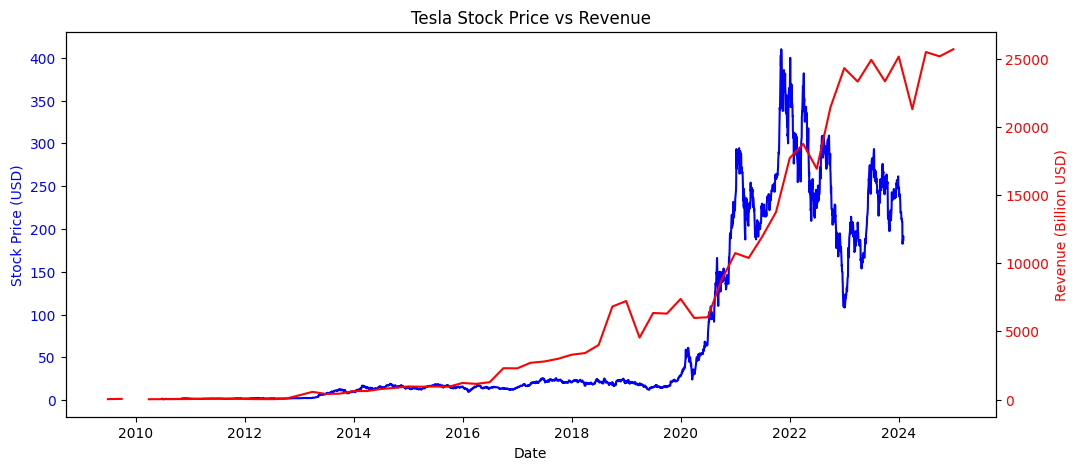

In [44]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Plot stock price
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color="blue")
    ax1.plot(stock_data["Date"], stock_data["Close"], color="blue", label="Stock Price")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Create second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.set_ylabel("Revenue (Billion USD)", color="red")
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color="red", label="Revenue")
    ax2.tick_params(axis="y", labelcolor="red")

    plt.title(title)
    plt.show()

# Assign the DataFrame 'df' to 'tesla_revenue'
tesla_revenue = df

# In ipython-input-43-c3598d6d6216:
import matplotlib.pyplot as plt

# ... (make_graph function definition) ...

# Plot Tesla data using the assigned 'tesla_revenue'
make_graph(tesla_data, tesla_revenue, "Tesla Stock Price vs Revenue")

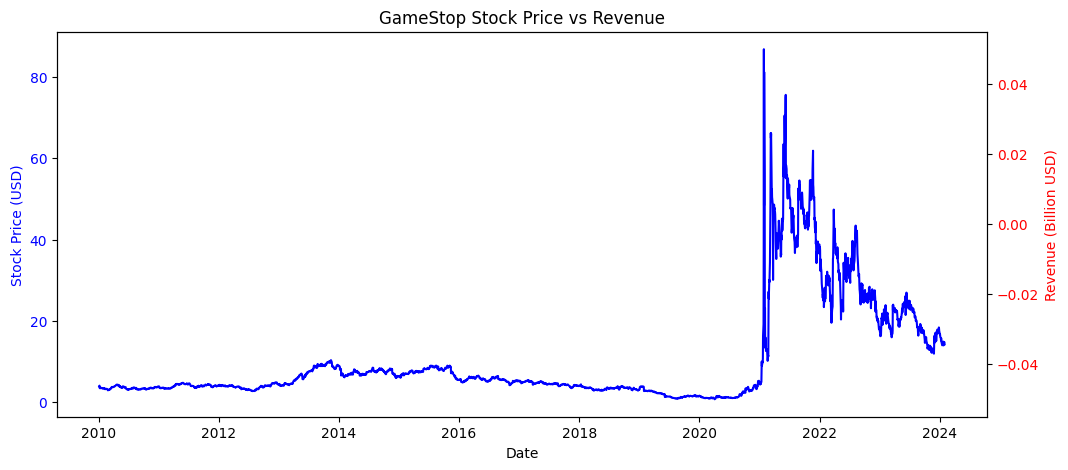

In [45]:
# Plot GameStop data
make_graph(gme_data, gme_revenue, "GameStop Stock Price vs Revenue")

In [46]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

In [47]:
import yfinance as yf
import pandas as pd

In [48]:
apple = yf.Ticker("AAPL")

In [49]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-02-07 20:01:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-02-07 20:01:02 (1.33 GB/s) - ‘apple.json’ saved [5699/5699]



In [50]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [51]:
apple_info['country']

'United States'

In [55]:
apple_share_price_data = apple.history(period="max")

In [54]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


In [56]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

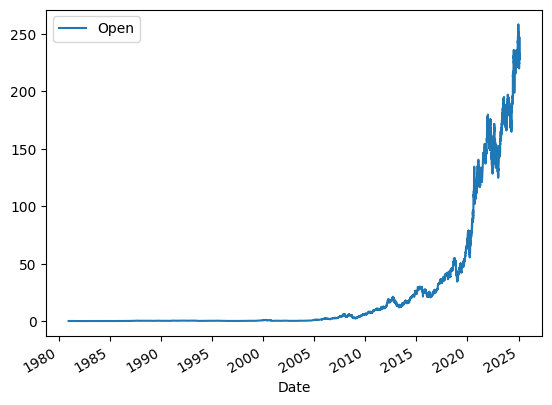

In [58]:
apple_share_price_data.plot(x="Date", y="Open")

In [59]:
apple.dividends

,Dividends
Date,
1987-05-11 00:00:00-04:00,0.000536
1987-08-10 00:00:00-04:00,0.000536
1987-11-17 00:00:00-05:00,0.000714
1988-02-12 00:00:00-05:00,0.000714
1988-05-16 00:00:00-04:00,0.000714
...,...
2023-11-10 00:00:00-05:00,0.240000
2024-02-09 00:00:00-05:00,0.240000
2024-05-10 00:00:00-04:00,0.250000


<Axes: xlabel='Date'>

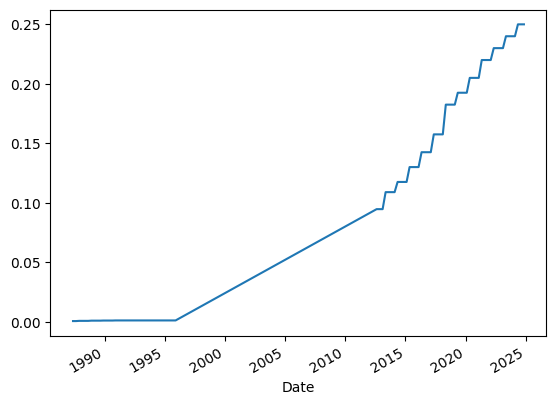

In [60]:
apple.dividends.plot()

In [61]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2025-02-07 20:05:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-02-07 20:05:04 (1.45 GB/s) - ‘amd.json’ saved [5838/5838]



In [63]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [70]:
import json
import yfinance as yf

# Load the JSON file
with open('amd.json') as json_file:
    amd_info = json.load(json_file)

# Question 1: Find the country the stock belongs to
country = amd_info.get("country", "Not found")
print(f"Country: {country}")

# Question 2: Find the sector the stock belongs to
sector = amd_info.get("sector", "Not found")
print(f"Sector: {sector}")

# Question 3: Obtain stock data for AMD using yfinance
amd = yf.Ticker("AMD")  # Get AMD stock data
amd_history = amd.history(period="max")  # Get full historical data

# Get the first day's traded volume
first_day_volume = amd_history.iloc[0]["Volume"]
print(f"First Day Traded Volume: {first_day_volume}")

Country: United States
Sector: Technology
First Day Traded Volume: 219600.0


In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# 1. Fetch the HTML content
url = "https://www.nasdaq.com/market-activity/stocks/amzn"  # Replace with the actual URL of Amazon stock data

# Add headers and a timeout to the request
headers = {"User-Agent": "Mozilla/5.0"}  # Pretend to be a browser
try:
    response = requests.get(url, headers=headers, timeout=10)  # Timeout after 10 seconds
    response.raise_for_status()  # Check if request was successful
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    exit()  # Or handle the error in another way

# 2. Parse the HTML with BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# 3. Create an empty DataFrame
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

# 4. Extract the table data
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")

    # Check if the row has enough columns before accessing them
    if len(col) >= 7:  # Ensure there are at least 7 columns (Date, Open, High, Low, Close, Adj Close, Volume)
        date = col[0].text.strip()  # Extract Date
        Open = col[1].text.strip()  # Extract Open price
        high = col[2].text.strip()  # Extract High price
        low = col[3].text.strip()  # Extract Low price
        close = col[4].text.strip()  # Extract Close price
        adj_close = col[5].text.strip()  # Extract Adjusted Close price
        volume = col[6].text.strip().replace(',', '')  # Extract Volume (remove commas)

        # Append the row to the DataFrame
        amazon_data = pd.concat([amazon_data, pd.DataFrame({
            "Date": [date], "Open": [Open], "High": [high], "Low": [low],
            "Close": [close], "Adj Close": [adj_close], "Volume": [volume]
        })], ignore_index=True)
    else:
        print(f"Skipping row with insufficient columns: {row}")  # Print a warning for skipped rows

# Convert data types (important for numerical analysis)
amazon_data["Open"] = pd.to_numeric(amazon_data["Open"], errors='coerce')
amazon_data["High"] = pd.to_numeric(amazon_data["High"], errors='coerce')
amazon_data["Low"] = pd.to_numeric(amazon_data["Low"], errors='coerce')
amazon_data["Close"] = pd.to_numeric(amazon_data["Close"], errors='coerce')
amazon_data["Adj Close"] = pd.to_numeric(amazon_data["Adj Close"], errors='coerce')
amazon_data["Volume"] = pd.to_numeric(amazon_data["Volume"], errors='coerce')

# 5. Print first five rows
print(amazon_data.head())

# Question 2: What are the names of the columns?
print(f"Column Names: {list(amazon_data.columns)}")


Skipping row with insufficient columns: <tr class="jupiter22-bid-and-ask__bidask-row" role="row">
<td class="jupiter22-bid-and-ask__bidaskcellheading" role="cell">
<td class="jupiter22-bid-and-ask__bidaskcell" role="cell"></td>
</td></tr>
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []
Column Names: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [73]:
# ... (Previous code for scraping and creating amazon_data) ...

# Convert the 'Open' column to numeric if necessary
amazon_data['Open'] = pd.to_numeric(amazon_data['Open'], errors='coerce')

# Get the Open price of the last row if the DataFrame is not empty
if not amazon_data.empty:
    open_price_last_row = amazon_data.iloc[-1]['Open']
    print(f"Open Price of Last Row: {open_price_last_row}")
else:
    print("DataFrame is empty. Cannot access Open price of the last row.")

DataFrame is empty. Cannot access Open price of the last row.
